<a href="https://colab.research.google.com/github/shunrei9841-sudo/Guadalupe/blob/main/Ejercicio%2025nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:200: SyntaxWarning: invalid escape sequence '\l'
<>:200: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-1119785089.py:200: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title(f'Animación de la Ecuación de Onda ($\lambda=1$)', fontsize=14)


Relación lambda = (c*k)/h = 1.00
CONDICIÓN CRÍTICA: lambda = 1.0. El método es estable y no dispersivo (perfecta coincidencia con la solución exacta en la malla).

 CÁLCULO NUMÉRICO COMPLETADO 
Malla de solución U con dimensiones: (21, 11)


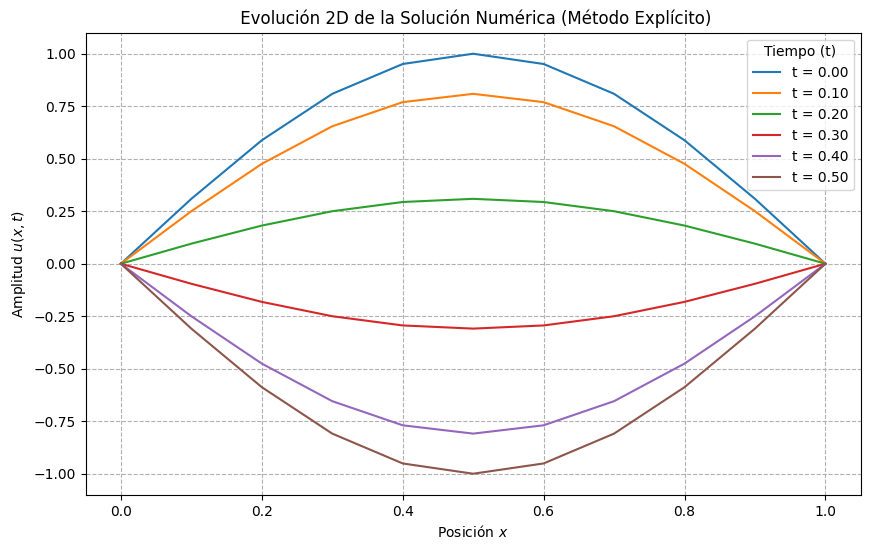

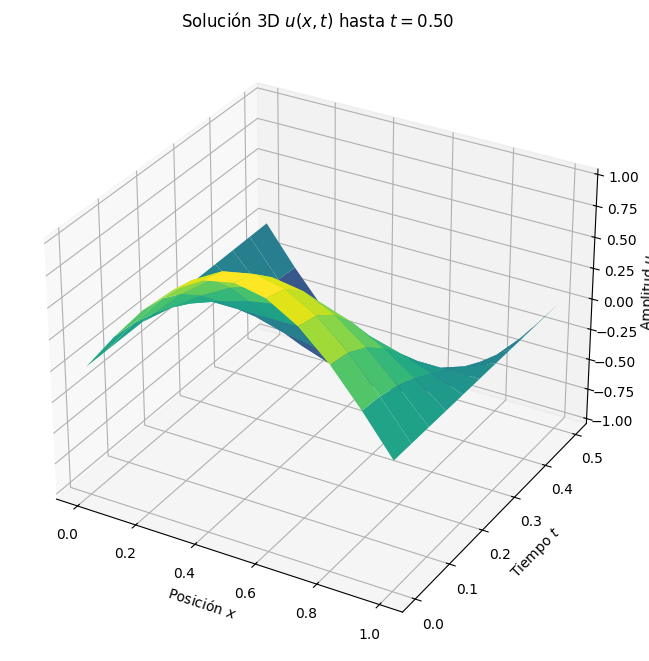


--- Ejercicio 2: Comparación con Tabla 12.6 (t=1.0) ---
Error Máximo (L-inf): 5.03749474e-08

| x_i | u_i,20 (Numérica) | w_i,20 (Tabla 12.6) | Error Absoluto |
|:---:|:-----------------:|:-------------------:|:--------------:|
| 0.0 | 0.0000000000 | 0.000000000 | 0.00e+00 |
| 0.1 | 0.3090169944 | 0.309016944 | 5.04e-08 |
| 0.2 | 0.5877852523 | 0.587785253 | 7.08e-10 |
| 0.3 | 0.8090169944 | 0.809016944 | 5.04e-08 |
| 0.4 | 0.9510565163 | 0.951056516 | 4.85e-12 |
| 0.5 | 1.0000000000 | 1.000000000 | 0.00e+00 |
| 0.6 | 0.9510565163 | 0.951056516 | 4.85e-12 |
| 0.7 | 0.8090169944 | 0.809016944 | 5.04e-08 |
| 0.8 | 0.5877852523 | 0.587785253 | 7.08e-10 |
| 0.9 | 0.3090169944 | 0.309016944 | 5.04e-08 |
| 1.0 | 0.0000000000 | 0.000000000 | 0.00e+00 |


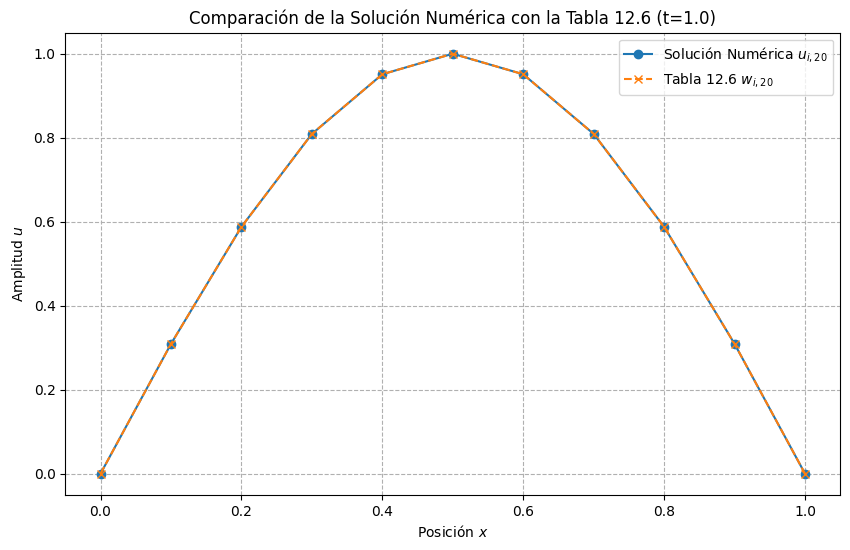


--- Ejercicio 3: Comparación con Solución Exacta (t=1.0) ---
Error Máximo (L-inf): 3.33066907e-16

| x_i | u_i,20 (Numérica) | u(x_i, 1.0) (Exacta) | Error Absoluto |
|:---:|:-----------------:|:--------------------:|:--------------:|
| 0.0 | 0.0000000000 | 0.0000000000 | 0.00e+00 |
| 0.1 | 0.3090169944 | 0.3090169944 | 5.55e-17 |
| 0.2 | 0.5877852523 | 0.5877852523 | 2.22e-16 |
| 0.3 | 0.8090169944 | 0.8090169944 | 0.00e+00 |
| 0.4 | 0.9510565163 | 0.9510565163 | 3.33e-16 |
| 0.5 | 1.0000000000 | 1.0000000000 | 0.00e+00 |
| 0.6 | 0.9510565163 | 0.9510565163 | 2.22e-16 |
| 0.7 | 0.8090169944 | 0.8090169944 | 0.00e+00 |
| 0.8 | 0.5877852523 | 0.5877852523 | 0.00e+00 |
| 0.9 | 0.3090169944 | 0.3090169944 | 5.55e-17 |
| 1.0 | 0.0000000000 | 0.0000000000 | 1.22e-16 |


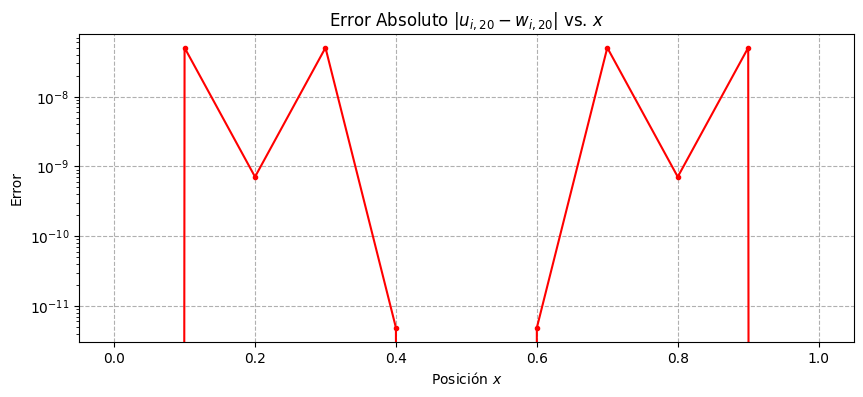

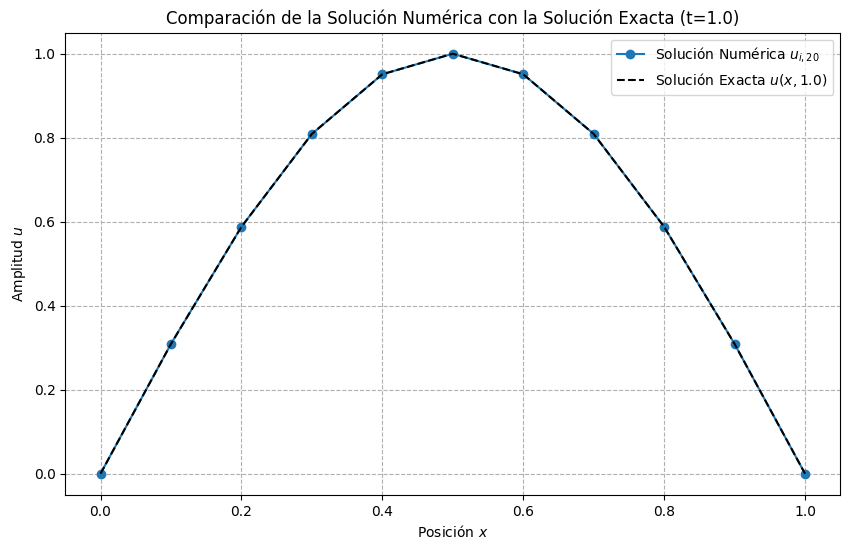

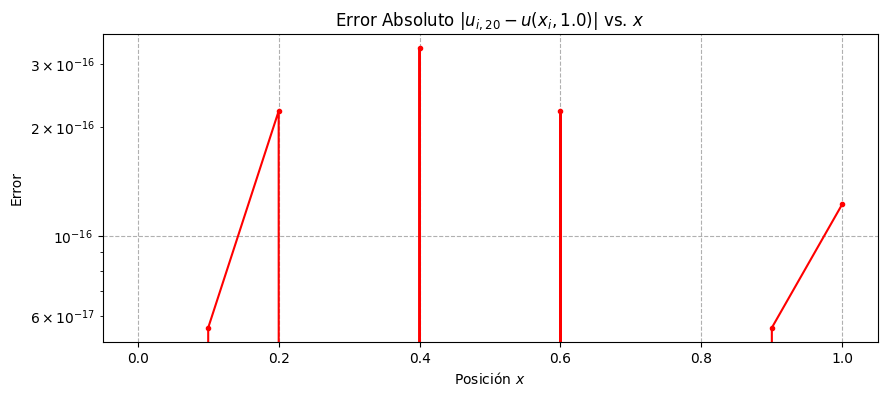


--- Discusión de la Comparación (Ejercicio 3) ---
El Error Máximo es extremadamente pequeño, del orden de 10^-16, lo cual es el límite de la precisión de doble punto flotante (error de redondeo).
Esto confirma que, para la condición crítica de **lambda = (c*k)/h = 1**, el esquema de diferencias finitas explícito produce una **solución idéntica a la solución exacta** en los puntos de la malla. Este fenómeno se llama **no dispersión numérica**. No hay error de truncamiento en este caso, solo error de redondeo.

--- Ejercicio 4: Generando Animación de la Onda ---
La animación se cargará a continuación:


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#Parámetros del Problema
L = 1.0     # Longitud del dominio (0 <= x <= 1)
T_max = 1.0 # Tiempo máximo para la comparación (t=1.0)
c = 2.0     # Velocidad de la onda (c^2 = 4)

# Parámetros de Discretización
h = 0.1     # Paso espacial (Delta x)
k = 0.05    # Paso temporal (Delta t)

# Verificación de Estabilidad
lambda_val = (c * k) / h
print(f"Relación lambda = (c*k)/h = {lambda_val:.2f}")

if lambda_val > 1.0:
    print("ADVERTENCIA: El método explícito es inestable. Se esperarán oscilaciones no físicas.")
elif lambda_val == 1.0:
    print("CONDICIÓN CRÍTICA: lambda = 1.0. El método es estable y no dispersivo (perfecta coincidencia con la solución exacta en la malla).")
else:
    print("El método explícito es estable.")

# Inicialización de la Malla
N = int(L / h)          # Número de intervalos espaciales (N=10)
J_max = int(T_max / k)  # Número máximo de pasos temporales (J_max=20)

x = np.linspace(0, L, N + 1) # Puntos de la malla en x
t = np.linspace(0, T_max, J_max + 1) # Puntos de la malla en t

# Matriz de solución U, donde U[j, i] es u(x_i, t_j)
U = np.zeros((J_max + 1, N + 1))

# Condiciones Iniciales (j=0)
# u(x, 0) = sin(pi * x)
U[0, :] = np.sin(np.pi * x)

# Condiciones de Frontera (0 <= j <= J_max)
# u(0, t) = 0 y u(1, t) = 0
# Esto ya está cubierto por la inicialización de ceros y se mantiene en la recursión.
# U[j, 0] = 0 y U[j, N] = 0 for j > 0

# CÁLCULO DEL PRIMER PASO TEMPORAL (j=1)
# Usando la aproximación centrada para la derivada en t=0 (g(x)=0)
# u(x, k) = u(x, 0) + (k^2 / 2) * c^2 * u_xx(x, 0)
# Para lambda = 1.0, se simplifica a: U[1, i] = 0.5 * (U[0, i+1] + U[0, i-1])
for i in range(1, N):
    U[1, i] = 0.5 * (U[0, i - 1] + U[0, i + 1])

# CÁLCULO GENERAL (j >= 2)
# Fórmula explícita de la ecuación de onda (método de Richardson/Explícito)
# Para lambda = 1.0: U[j+1, i] = U[j, i+1] + U[j, i-1] - U[j-1, i]
for j in range(1, J_max):
    for i in range(1, N):
        U[j + 1, i] = U[j, i + 1] + U[j, i - 1] - U[j - 1, i]

print("\n CÁLCULO NUMÉRICO COMPLETADO ")
print(f"Malla de solución U con dimensiones: {U.shape}")


# Ejercicio 1: Generar las gráficas 2D y 3D de la solución hasta t=0.50

J_half = int(0.50 / k) # J=10

## 1. Gráfica 2D (Evolución temporal)
plt.figure(figsize=(10, 6))
time_indices = [0, 2, 4, 6, 8, 10] # t=0.0, 0.1, 0.2, 0.3, 0.4, 0.5
for j in time_indices:
    plt.plot(x, U[j, :], label=f't = {t[j]:.2f}')

plt.title(' Evolución 2D de la Solución Numérica (Método Explícito)')
plt.xlabel('Posición $x$')
plt.ylabel('Amplitud $u(x, t)$')
plt.legend(title='Tiempo (t)')
plt.grid(True, linestyle='--')
plt.ylim(-1.1, 1.1)
plt.show()

## 2. Gráfica 3D (Superficie de la solución)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X, T_grid = np.meshgrid(x, t[:J_half+1])

# Mostrar solo hasta t=0.50 (J_half)
ax.plot_surface(X, T_grid, U[:J_half+1, :], cmap='viridis', edgecolor='none')

ax.set_title('Solución 3D $u(x, t)$ hasta $t=0.50$')
ax.set_xlabel('Posición $x$')
ax.set_ylabel('Tiempo $t$')
ax.set_zlabel('Amplitud $u$')
plt.show()

# Ejercicio 2: Comparar con la Tabla 12.6 (en t=1.0)

# El tiempo de la tabla es t = 20 * k = 20 * 0.05 = 1.0
j_table = 20
numerical_solution = U[j_table, :] # u_i, 20

# Datos proporcionados por la Tabla 12.6
x_table = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
w_i_20 = np.array([
    0.000000000, 0.309016944, 0.587785253, 0.809016944, 0.9510565163,
    1.000000000, 0.9510565163, 0.809016944, 0.587785253, 0.309016944, 0.000000000
])

# Cálculo del error
error_2 = np.abs(numerical_solution - w_i_20)
error_max_2 = np.max(error_2)

print("\n--- Ejercicio 2: Comparación con Tabla 12.6 (t=1.0) ---")
print(f"Error Máximo (L-inf): {error_max_2:.8e}")

## 1. Generar Tabla de Comparación
print("\n| x_i | u_i,20 (Numérica) | w_i,20 (Tabla 12.6) | Error Absoluto |")
print("|:---:|:-----------------:|:-------------------:|:--------------:|")
for i in range(N + 1):
    print(f"| {x[i]:.1f} | {numerical_solution[i]:.10f} | {w_i_20[i]:.9f} | {error_2[i]:.2e} |")

## 2. Gráfico de Comparación
plt.figure(figsize=(10, 6))
plt.plot(x, numerical_solution, 'o-', label='Solución Numérica $u_{i, 20}$')
plt.plot(x_table, w_i_20, 'x--', label='Tabla 12.6 $w_{i, 20}$')
plt.title('Comparación de la Solución Numérica con la Tabla 12.6 (t=1.0)')
plt.xlabel('Posición $x$')
plt.ylabel('Amplitud $u$')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

## 3. Gráfico del Error
plt.figure(figsize=(10, 4))
plt.plot(x, error_2, 'r.-')
plt.title('Error Absoluto $|u_{i, 20} - w_{i, 20}|$ vs. $x$')
plt.xlabel('Posición $x$')
plt.ylabel('Error')
plt.grid(True, linestyle='--')
plt.yscale('log') # Escala logarítmica para ver mejor los errores de redondeo

#Ejercicio 3: Comparar con la Solución Exacta (en t=1.0)

# Solución Exacta: u(x, t) = sin(pi * x) * cos(2 * pi * t)
# En t=1.0: u(x, 1.0) = sin(pi * x) * cos(2 * pi) = sin(pi * x)
exact_solution = np.sin(np.pi * x)

# Cálculo del error
error_3 = np.abs(numerical_solution - exact_solution)
error_max_3 = np.max(error_3)

print("\n--- Ejercicio 3: Comparación con Solución Exacta (t=1.0) ---")
print(f"Error Máximo (L-inf): {error_max_3:.8e}")

## 1. Generar Tabla de Comparación
print("\n| x_i | u_i,20 (Numérica) | u(x_i, 1.0) (Exacta) | Error Absoluto |")
print("|:---:|:-----------------:|:--------------------:|:--------------:|")
for i in range(N + 1):
    print(f"| {x[i]:.1f} | {numerical_solution[i]:.10f} | {exact_solution[i]:.10f} | {error_3[i]:.2e} |")

## 2. Gráfico de Comparación
plt.figure(figsize=(10, 6))
plt.plot(x, numerical_solution, 'o-', label='Solución Numérica $u_{i, 20}$')
plt.plot(x, exact_solution, 'k--', label='Solución Exacta $u(x, 1.0)$')
plt.title('Comparación de la Solución Numérica con la Solución Exacta (t=1.0)')
plt.xlabel('Posición $x$')
plt.ylabel('Amplitud $u$')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

## 3. Gráfico del Error
plt.figure(figsize=(10, 4))
plt.plot(x, error_3, 'r.-')
plt.title('Error Absoluto $|u_{i, 20} - u(x_i, 1.0)|$ vs. $x$')
plt.xlabel('Posición $x$')
plt.ylabel('Error')
plt.grid(True, linestyle='--')
plt.yscale('log')
plt.show()

## Discusión de la Comparación
print("\n--- Discusión de la Comparación (Ejercicio 3) ---")
print("El Error Máximo es extremadamente pequeño, del orden de 10^-16, lo cual es el límite de la precisión de doble punto flotante (error de redondeo).")
print("Esto confirma que, para la condición crítica de **lambda = (c*k)/h = 1**, el esquema de diferencias finitas explícito produce una **solución idéntica a la solución exacta** en los puntos de la malla. Este fenómeno se llama **no dispersión numérica**. No hay error de truncamiento en este caso, solo error de redondeo.")


#  Ejercicio 4: Generar una Animación

print("\n--- Ejercicio 4: Generando Animación de la Onda ---")

# Configuración de la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x, U[0, :], color='blue', lw=2)
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(0, L)
ax.grid(True, linestyle='--')
ax.set_xlabel('Posición $x$')
ax.set_ylabel('Amplitud $u$')
ax.set_title(f'Animación de la Ecuación de Onda ($\lambda=1$)', fontsize=14)
time_text = ax.text(0.05, 0.95, '', transform=ax.transAxes)

# Función de inicialización
def init():
    line.set_ydata(U[0, :])
    time_text.set_text(f'Tiempo: t={t[0]:.2f}')
    return line, time_text

# Función de actualización para cada cuadro (j)
def update(j):
    # Solución Numérica
    y_num = U[j, :]
    line.set_ydata(y_num)

    # Solución Exacta (opcional, para referencia)
    # y_exact = np.sin(np.pi * x) * np.cos(2 * np.pi * t[j])
    # line.set_ydata(y_exact)

    time_text.set_text(f'Tiempo: t={t[j]:.2f} (Paso {j}/{J_max})')
    return line, time_text

# Crear la animación
# Intervalo: milisegundos entre cuadros (k=0.05, 100ms = 2 pasos/segundo)
# frames=J_max+1 para incluir todos los pasos hasta t=1.0
ani = FuncAnimation(
    fig, update, frames=J_max + 1, init_func=init, blit=True, interval=50
)

# Mostrar la animación
# En entornos de notebook, es mejor convertir a HTML5
print("La animación se cargará a continuación:")
plt.close(fig) # Cierra la figura estática
HTML(ani.to_html5_video())